In [95]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

class Agent:

    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = rnd.uniform(0, 1), rnd.uniform(0, 1)

    def get_distance(self, other):
        "Computes the euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return np.sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        
        self.same_type = num_same_type
        
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()


def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    same_type = [a.same_type for a in agents] 
    ax.set_title(f'Cycle {cycle_num-1}, avg same_type {np.average(same_type)}')
    plt.show()



In [96]:
from scipy.stats import kde

def plot_distribution_2d(agents, cycle_num):
    loc = np.array([a.location for a in agents])
    t   = np.array([a.type for a in agents])
    relevantLoc = loc[t == 1]

    x = relevantLoc[:,0]
    y = relevantLoc[:,1]
    
    from scipy.stats import kde

    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    nbins=300

    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
    plt.show()

Entering loop  1


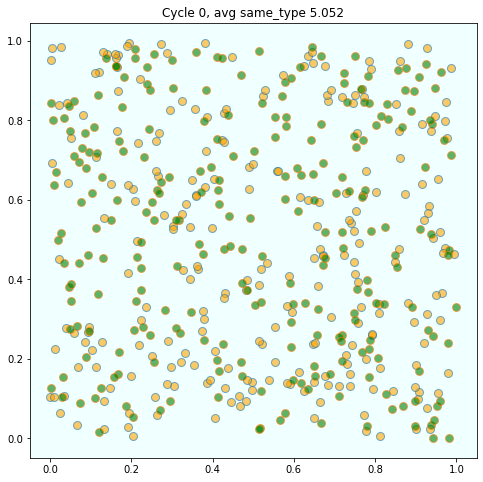

Converged, terminating.


In [102]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 0   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))

# initiatlize the same_type
_ = [a.happy(agents) for a in agents]

count = 1
# ==  Loop until none wishes to move == #
while True:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')

In [147]:
# == Main == #

import pandas as pd

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 0   # Want at least this many neighbors to be same type

myLogger = pd.DataFrame({'Cycle':[], 'required_same': [], 'same_type_avg':[] })


for require_same_type in range(0, 9):
    print(f'Requiring number of neighbors to be a least {require_same_type} of my kind')
    for i in range(10):
        print(f'Running itteration {i}')
        # == Create a list of agents == #
        agents = [Agent(0) for i in range(num_of_type_0)]
        agents.extend(Agent(1) for i in range(num_of_type_1))

        # initiatlize the same_type
        _ = [a.happy(agents) for a in agents]

        count = 1
        # ==  Loop until none wishes to move == #


        while True:
            count += 1
            no_one_moved = True
            for agent in agents:
                old_location = agent.location
                agent.update(agents)
                if agent.location != old_location:
                    no_one_moved = False
            if no_one_moved:
                break

        same_type = [a.same_type for a in agents] 
        print(np.average(same_type))
        myLogger = myLogger.append({'Cycle': i, 'required_same': require_same_type,'same_type_avg': np.average(same_type)}, ignore_index=True)
        

Requiring number of neighbors to be a least 0 of my kind
Running itteration 0
4.976
Running itteration 1
5.11
Running itteration 2
5.038
Running itteration 3
5.032
Running itteration 4


KeyboardInterrupt: 

<AxesSubplot:xlabel='required_same'>

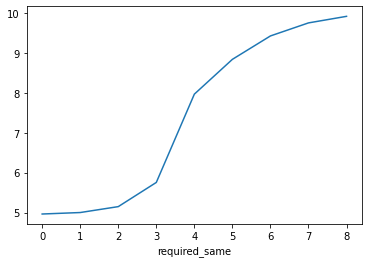

In [137]:
myLogger.groupby('required_same').mean().same_type_avg.plot()

<AxesSubplot:xlabel='required_same', ylabel='same_type_avg'>

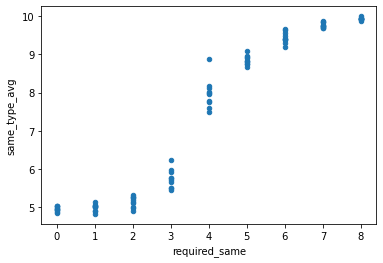

In [146]:
myLogger.plot(x = 'required_same', y = 'same_type_avg', kind = 'scatter')


In [170]:
i = 9

domain = np.linspace(i,10,10+i)
weights = 1/len(domain)
sum(domain*weights)

9.500000000000004

In [163]:
domain

array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,
        7.75,  8.5 ,  9.25, 10.  ])